# Diabetes Prediction model using SVM

### Importing Dependencies

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


### Loading the dataset


In [2]:
# loading the daibetes dataset to a pandas dataframe

dataset = pd.read_csv("diabetes_01.csv")
dataset.head()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [3]:
# printing the first 5 rows of the dataset

dataset.head()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [4]:
# columns in dataset

dataset.columns

Index(['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [5]:
# shape of dataset

dataset.shape

(253680, 22)

In [6]:
# information about dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes              253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [7]:
# statistical measures of the data

dataset.describe()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [8]:
# checking for null values 

dataset.isnull().sum()
# there is no null values

Diabetes                0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
dataset['Diabetes'].value_counts()

# values in features 

Diabetes
0    218334
1     35346
Name: count, dtype: int64

### Representation 

0 : Non-Diabetic 

1 : Diabetic

In [10]:
dataset = pd.read_csv("diabetes_01.csv")

dataset.groupby('Diabetes').mean()

# grouping the people by mean of values 

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes,,,,,,,,,,,,,,,,,,,,,
0,0.376602,0.384297,0.957730,27.805770,0.431019,0.032171,0.073351,0.776943,0.642158,0.820326,...,0.949641,0.080665,2.385185,2.978034,3.641082,0.135361,0.434064,7.814065,5.099797,6.190474
1,0.752674,0.670118,0.993182,31.944011,0.518220,0.092457,0.222882,0.630538,0.585441,0.756408,...,0.959769,0.105868,3.290981,4.461806,7.954479,0.371216,0.479121,9.379053,4.745516,5.210094


## Data Visualization 

<Axes: xlabel='Diabetes', ylabel='count'>

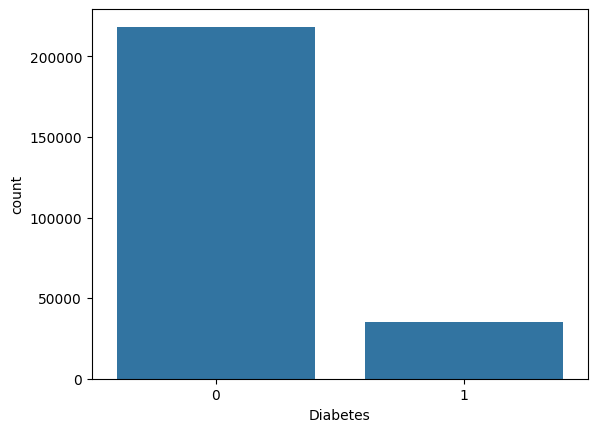

In [11]:
sns.countplot(x=dataset["Diabetes"])

# distribution of target 

<Axes: xlabel='Age', ylabel='count'>

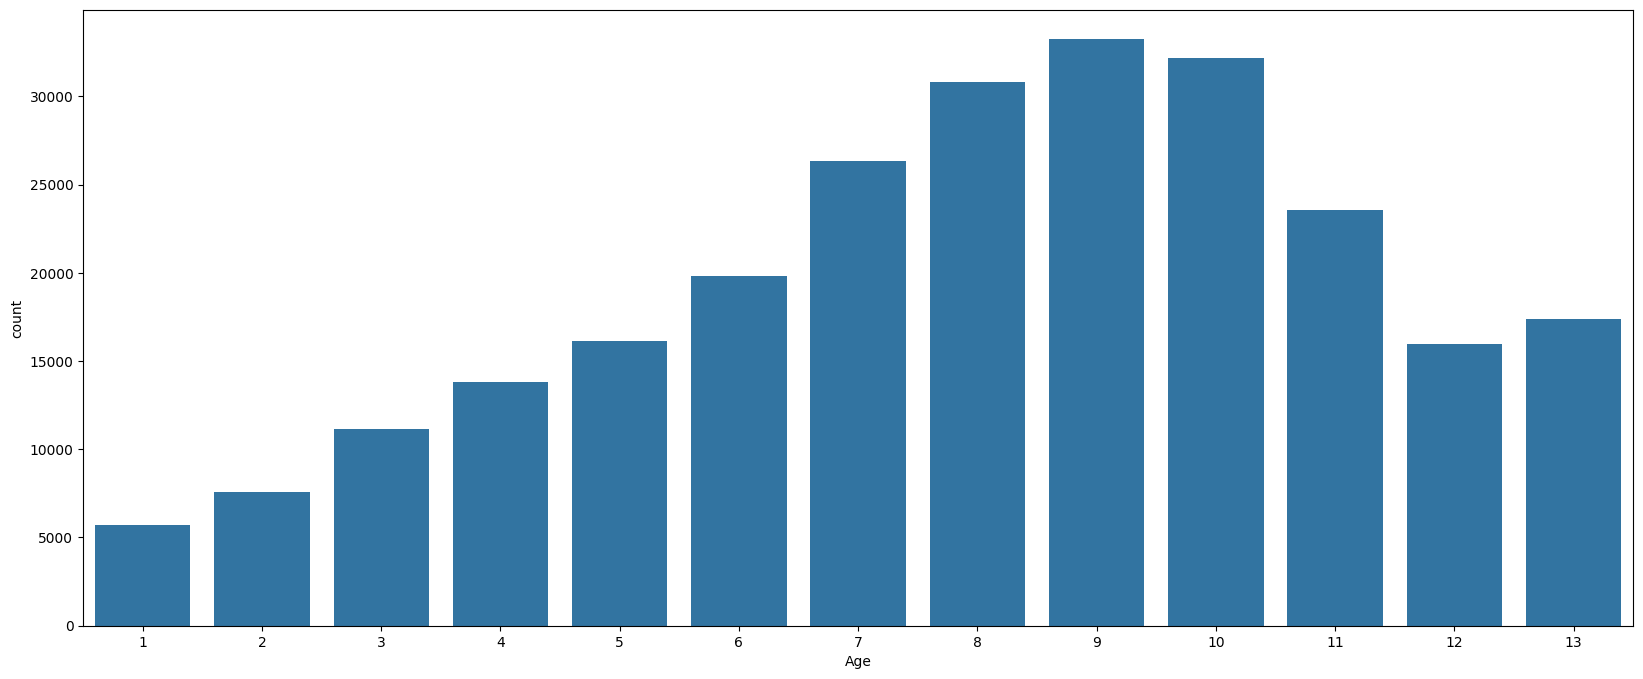

In [12]:
# counter plot of feature age
plt.figure(figsize = (20,8))
sns.countplot(x = dataset['Age'])

# there are 72 persons having age 22 in dataset 

### Spliting the data and labels

In [13]:
X = dataset.drop(columns = 'Diabetes', axis = 1)
Y = dataset['Diabetes']

In [14]:
X.head(15)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
5,1,1,1,25,1,0,0,1,1,1,...,1,0,2,0,2,0,1,10,6,8
6,1,0,1,30,1,0,0,0,0,0,...,1,0,3,0,14,0,0,9,6,7
7,1,1,1,25,1,0,0,1,0,1,...,1,0,3,0,0,1,0,11,4,4
8,1,1,1,30,1,0,1,0,1,1,...,1,0,5,30,30,1,0,9,5,1
9,0,0,1,24,0,0,0,0,0,1,...,1,0,2,0,0,0,1,8,4,3


In [15]:
Y.head(15)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     0
10    1
11    0
12    0
13    1
14    0
Name: Diabetes, dtype: int64

#### Data Standardization

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(X)
X_standard = scaler.transform(X)

In [18]:
print(X_standard)

[[ 1.15368814  1.16525449  0.19692156 ...  0.31690008 -1.06559465
  -1.4744874 ]
 [-0.86678537 -0.85818163 -5.07816412 ... -0.33793279  0.96327159
  -2.44013754]
 [ 1.15368814  1.16525449  0.19692156 ...  0.31690008 -1.06559465
   0.93963796]
 ...
 [-0.86678537 -0.85818163  0.19692156 ... -1.97501498 -0.05116153
  -1.95731247]
 [ 1.15368814 -0.85818163  0.19692156 ... -0.33793279 -0.05116153
  -2.44013754]
 [ 1.15368814  1.16525449  0.19692156 ...  0.31690008  0.96327159
  -1.95731247]]


In [19]:
X = X_standard
print(X[0:10])

# printing first 10 values 

[[ 1.15368814  1.16525449  0.19692156  1.75793567  1.12092719 -0.20563655
  -0.3224576  -1.76281393 -1.31687168  0.48208665 -0.24401415  0.22686264
  -0.30317313  2.32912057  1.99859213  1.23399871  2.22361507 -0.88702088
   0.31690008 -1.06559465 -1.4744874 ]
 [-0.86678537 -0.85818163 -5.07816412 -0.51180614  1.12092719 -0.20563655
  -0.3224576   0.56727485 -1.31687168 -2.07431589 -0.24401415 -4.40795367
   3.29844532  0.45729435 -0.42962961 -0.48659241 -0.44971813 -0.88702088
  -0.33793279  0.96327159 -2.44013754]
 [ 1.15368814  1.16525449  0.19692156 -0.05785778 -0.8921186  -0.20563655
  -0.3224576  -1.76281393  0.75937543 -2.07431589 -0.24401415  0.22686264
   3.29844532  2.32912057  3.61740662  2.95458982  2.22361507 -0.88702088
   0.31690008 -1.06559465  0.93963796]
 [ 1.15368814 -0.85818163  0.19692156 -0.2091739  -0.8921186  -0.20563655
  -0.3224576   0.56727485  0.75937543  0.48208665 -0.24401415  0.22686264
  -0.30317313 -0.47861876 -0.42962961 -0.48659241 -0.44971813 -0.8870

## Train-Test Split

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 2)

In [21]:
print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of Y_test : ", X_test.shape)

Shape of X_train :  (202944, 21)
Shape of X_test :  (50736, 21)
Shape of Y_train :  (202944,)
Shape of Y_test :  (50736, 21)


## Model Training 


In [45]:
# model = svm.SVC(kernel = 'linear')


In [46]:
# training the model with Logistic Regression

model.fit(X_train, Y_train)
# accuracy score on the training data

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print(" Accuracy score of the training data is : ",training_data_accuracy)

 Accuracy score of the training data is :  0.8638146483759066


In [27]:
# training with Decision Tree


dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt.fit(X_train, Y_train)
y_pred_dt = dt.predict(X_test)
print(" Accuracy score of the training data is : ",accuracy_score(Y_test, y_pred_dt))

 Accuracy score of the training data is :  0.8005558183538316


In [31]:
# # training with XGB classifier

# xgb_classifier = XGBClassifier()
# xgb_classifier.fit(X_train, Y_train)
# y_pred_xgb = xgb_classifier.predict(X_test)
# accuracy_score(Y_test, y_pred_xgb)

## Model Evaluation 

### Accuracy Score for testing data for SVC


In [37]:
# training the suppoprt vector machine classifier

model.fit(X_train, Y_train)
# accuracy score on the testing data

X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print(" Accuracy score of the testing data is : ",testing_data_accuracy)

 Accuracy score of the testing data is :  0.8626419110690634


### Confusion Matrix

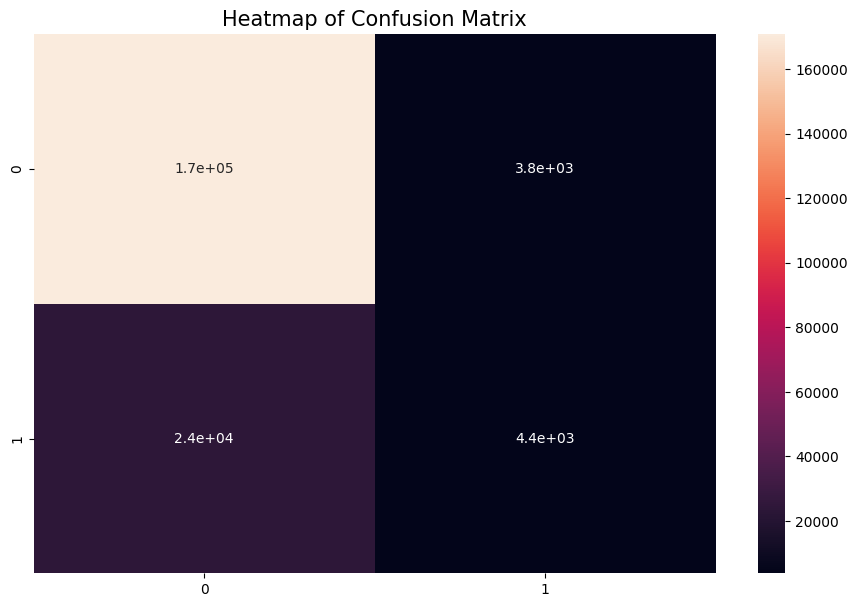

In [33]:
plt.figure(figsize = (11,7))
cm = confusion_matrix(Y_train, X_train_prediction)
plt.title("Heatmap of Confusion Matrix", fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()



### Classification Report of model

In [34]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92     43667
           1       0.52      0.15      0.24      7069

    accuracy                           0.86     50736
   macro avg       0.70      0.57      0.58     50736
weighted avg       0.83      0.86      0.83     50736



## Making a prediction system

In [47]:
# input_data = (5,166,72,19,175,25.8,0.587,51)

# # changing data to numpy array 
# input_data_array = np.asarray(input_data)

# # reshape the array as we are predicting for one instance
# input_data_reshaped =  input_data_array.reshape(1,-1)


# # standarize the input data
# std_data = scaler.transform(input_data_reshaped)
# print(std_data)

In [48]:

result = model.predict(std_data)
print("The prediction is : ",result)

if (result[0] == 0):
  print("The person is not Diabetic")
else:
  print("The person is Diabetic")

NameError: name 'std_data' is not defined